In [52]:
# import libraries

import random
import math
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

Step 2
Write a program that computes the analytical solution for the propagation of surface water waves into a homogeneous
aquifer.

In [53]:
def calculate_hxt_for_one_variable(D_input, A_input, w_input, phase_input, x_input, t_input):
  fun1 = A_input * math.exp(-x_input * math.sqrt(w_input / (2*D_input)))
  fun2 = math.sin(-x_input * math.sqrt((w_input / (2*D_input)) + ((w_input * t_input) + phase_input)))
  return fun1 * fun2

# Step 3

for the values x= 1m, 10m, 100m and t=7d, 30d and 180d (a total of 9 combinations), generate 100 realizations of the hydraulic head considering the following uniform distributions:
- logA = [-1 1] (m)
- $ \omega $ = [2pi/7 2pi/2] (d)
- Compute a reasonable range for D considering a sandy-gravel aquifer with a saturated thickness of 10m (hint: the hydraulic conductivity varies over three orders of magnitude so it is useful to define a uniform distribution for its log)
- $\phi$ = [0 $ \pi $] radians

Perform a statistical analysis of the head values obtained (e.g. histogram).


In [54]:
class Result:
   def __repr__(self):
    return 'D={}, A={}, w={}, phase={}, x={}, t={}, hxt={}'.format(
      self.D,
      self.A,
      self.w,
      self.phase,
      self.x,
      self.t,
      self.hxt,        
    )

In [55]:
# Define a general function to generate n different realizations of the hydraulic head.
def calculate_hxt(D_vector, A_vector, w_vector, phase_vector, x_vector, t_vector):
	results = []

	for simulation_index in range(0, TOTAL_NUMBER_OF_SIMULATIONS):
		temp_result = Result()

		for x_index in range(0, len(x_vector)):
			for t_index in range(0, len(t_vector)):
				temp_result = Result()				
				temp_result.D = D_vector[simulation_index]
				temp_result.A = A_vector[simulation_index]
				temp_result.w = w_vector[simulation_index]
				temp_result.phase = phase_vector[simulation_index]
				temp_result.x = x_vector[x_index]
				temp_result.t = t_vector[t_index]

				temp_result.hxt = calculate_hxt_for_one_variable(temp_result.D, temp_result.A, temp_result.w, temp_result.phase, temp_result.x, temp_result.t)
				results.append(temp_result)

	return results

In [56]:
# Define a general function to draw histograms
def draw_plot(results, title):
  plt.hist([result.hxt for result in results], bins= 25)
  plt.title(title)
  plt.show()

In [57]:
# random.seed(123)

TOTAL_NUMBER_OF_SIMULATIONS = 100
x = [1, 10, 100]
t = [7, 30, 180]
b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 


   
# Define a general function to generate a uniform distribution in a given range.

def get_n_random_unifomr(low, high, n):
  result = [];
  for i in range(0, n):  
    result.append(random.uniform(low, high)) # a + (b-a) * random()
  return result


## Define the parameters in the given ranges.

# hydraulic conductivity 
K_exp_min = 0
K_exp_max = 2
K_exp_random = get_n_random_unifomr(K_exp_min, K_exp_max, 100)
K_exp = np.power(10, K_exp_random)
K_skalar = 8.64  #[m/d]
K = np.multiply(K_skalar, K_exp)
D = [((K_input * b) / sy) for K_input in K]
D_mean = mean(D)
D_mean_list = [D_mean] * TOTAL_NUMBER_OF_SIMULATIONS # D as a list of mean 100 times


A_exp_min = -1
A_exp_max = 1
A_exp_random = get_n_random_unifomr(A_exp_min, A_exp_max, 100)
A = np.power(5, A_exp_random)
A_mean = mean(A)
A_mean_list = [A_mean] * TOTAL_NUMBER_OF_SIMULATIONS # A as a list of mean 100 times

w_min = (2*math.pi) / 7
w_max = (2*math.pi)/2
w = get_n_random_unifomr(w_min, w_max, 100)
# w_mean = mean([w_min, w_max])
w_mean = mean(w)
w_mean_list = [w_mean] * TOTAL_NUMBER_OF_SIMULATIONS # w as a list of mean 100 times

phase_min = 0
phase_max = math.pi
phase = get_n_random_unifomr(phase_min, phase_max, 100)
# phase_mean = mean([phase_min, phase_max])
phase_mean = mean(phase)
phase_mean_list = [phase_mean] * TOTAL_NUMBER_OF_SIMULATIONS # phase as a list of mean 100 times



In [58]:
#Perform a statistical analysis of the head values obtained (e.g. histogram):

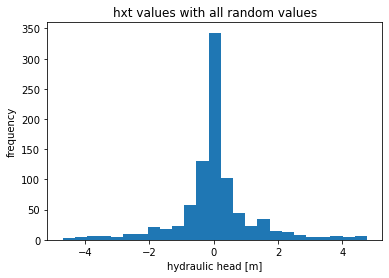

In [59]:
all_results=calculate_hxt(D, A, w, phase, x, t)
plt.ylabel('frequency')
plt.xlabel('hydraulic head [m]')
draw_plot(all_results, "hxt values with all random values")

7777.0415210961855 1.6225153744234817 1.9419135600134372 1.5696273098605258


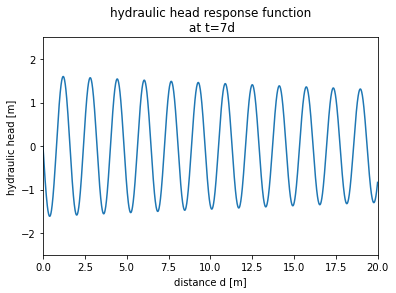

In [60]:
#plotting of the hydraulic head response curve

width=20 #in m
time=7 #in d

X=np.arange(0, width, 0.01)
t = np.array([time])
hxt_list = []
plt.title("hydraulic head response function\n at t={}d".format(time))
for x in X:
    hxt = calculate_hxt_for_one_variable(D_mean, A_mean, w_mean, phase_mean, x, t)
    hxt_list.append(hxt)
    
plt.ylabel('hydraulic head [m]')
plt.xlabel('distance d [m]')

Y = np.array(hxt_list)



plt.plot(X, Y)
plt.axis([0, width, -2.5, 2.5])
print(D_mean, A_mean, w_mean, phase_mean)

### Step 4

Perform a manual sensitivity analysis of the hydraulic head by changing one-at-the-time the parameters A, D, $\omega$ and $\phi$ in the given ranges (assume the parameter values are uniform distributed, use the mean value of the range during the one-at-the-time sensitivity analysis):

Generate 100 head realizations for each of the 9 (x,t) combinations considering only the uniform distributions for the sensitive parameters and analyze the statistical distribution of the newly generated heads.

In [61]:
#calculate sensitvity for A
A_exp_min = -1
A_exp_max = 1
A_min = pow(10, A_exp_min)
A_max = pow(10, A_exp_max)
x = [1, 10, 100]
t = [7, 30, 180]
S_list=[]
for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        hxt_A_min = calculate_hxt_for_one_variable(D_mean, A_min, w_mean, phase_mean, x, t)
        hxt_A_max = calculate_hxt_for_one_variable(D_mean, A_max, w_mean, phase_mean, x, t)
        S=abs((hxt_A_max-hxt_A_min)/(A_max-A_min))
        S_list.append(S)
S_A=mean(S_list)#sensitivity of A
print("sensitivity of A:")
print(S_A)
               


sensitivity of A:
0.5355570688428554


In [62]:
#calculate sensitivity for D

K_exp_min = pow(10,-4)
K_exp_max = pow(10,-3)
K_min = np.multiply(K_skalar, K_exp_min)
K_max = np.multiply(K_skalar, K_exp_max)
D_min = (K_min * b) / sy
D_max = (K_max * b) / sy

Sensitivity_D_list=[]

for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        hxt_min = calculate_hxt_for_one_variable(D_min, A_mean, w_mean, phase_mean, x, t)
        hxt_max = calculate_hxt_for_one_variable(D_max, A_mean, w_mean, phase_mean, x, t)
        S_D_list=abs((hxt_max-hxt_min)/(D_max-D_min))
        Sensitivity_D_list.append(S_D_list)
S_D=mean(Sensitivity_D_list) #sensitivity of D
#print(S_list)
print("sensitivity of D:")
print(S_D)


sensitivity of D:
0.21114236812864848


In [63]:
#calculate sensitivity for w

Sensitivity_w_list=[]

for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        hxt_min = calculate_hxt_for_one_variable(D_mean, A_mean, w_min, phase_mean, x, t)
        hxt_max = calculate_hxt_for_one_variable(D_mean, A_mean, w_max, phase_mean, x, t)
        S_w_list=abs((hxt_max-hxt_min)/(w_max-w_min))
        Sensitivity_w_list.append(S_w_list)
S_w=mean(Sensitivity_w_list) #sensitivity of w
#print(S_list)
print("sensitivity of w:")
print(S_w)


sensitivity of w:
0.552463200882775


In [64]:
#calculate sensitivity for phase

Sensitivity_phase_list=[]

#for phase in get_n_random_unifomr(phase_min, phase_max, 100))
for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        hxt_min = calculate_hxt_for_one_variable(D_mean, A_mean, w_mean, phase_max, x, t)
        hxt_max = calculate_hxt_for_one_variable(D_mean, A_mean, w_mean, phase_min, x, t)
        S_phase_list=abs((hxt_max-hxt_min)/(phase_max-phase_min))
        Sensitivity_phase_list.append(S_phase_list)
S_phase=mean(Sensitivity_phase_list) #sensitivity of phase
#print(S_list)
print("sensitivity of phase:")
print(S_phase)


sensitivity of phase:
0.1620109655340063


In [65]:
# Altogether
print("sensitivity of A:")
print(S_A)
print("sensitivity of D:")
print(S_D)
print("sensitivity of w:")
print(S_w)
print("sensitivity of phase:")
print(S_phase)

sensitivity of A:
0.5355570688428554
sensitivity of D:
0.21114236812864848
sensitivity of w:
0.552463200882775
sensitivity of phase:
0.1620109655340063


Sensivity of phase with:  x= 1  t= 7
0.1504394480084259


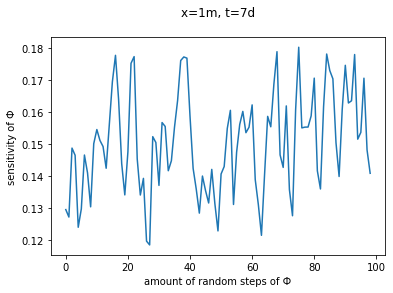

Sensivity of phase with:  x= 1  t= 30
0.012396426320381522


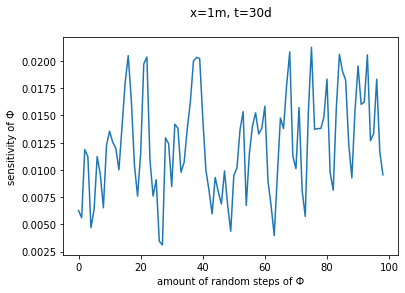

Sensivity of phase with:  x= 1  t= 180
0.042538178385538146


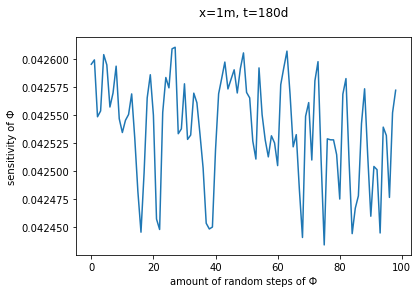

Sensivity of phase with:  x= 10  t= 7
0.9918396514243447


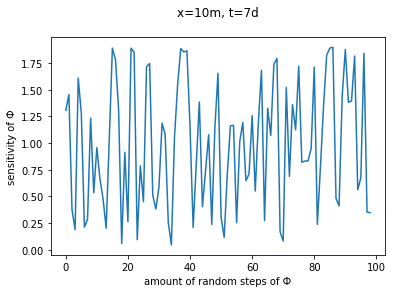

Sensivity of phase with:  x= 10  t= 30
0.40072564242104075


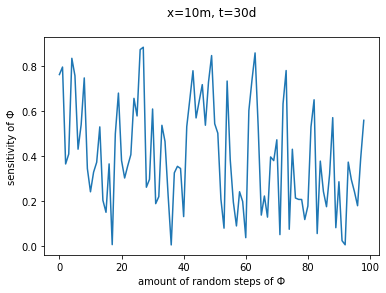

Sensivity of phase with:  x= 10  t= 180
0.16626690251062837


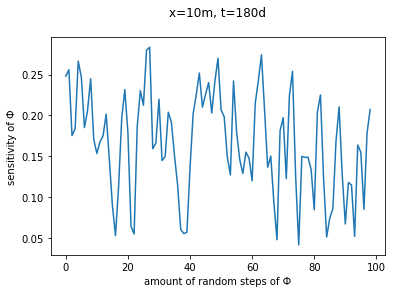

Sensivity of phase with:  x= 100  t= 7
1.2211944266002293


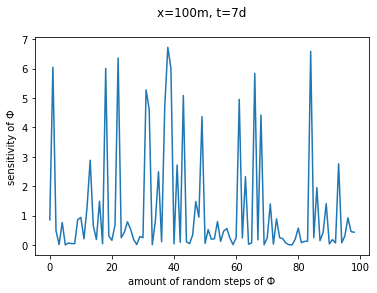

Sensivity of phase with:  x= 100  t= 30
0.9462318032918866


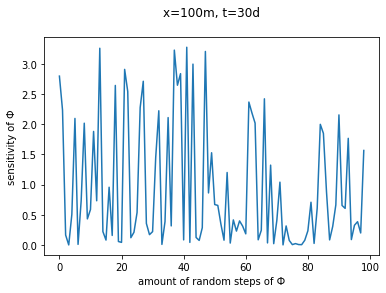

Sensivity of phase with:  x= 100  t= 180
0.5375162858914062


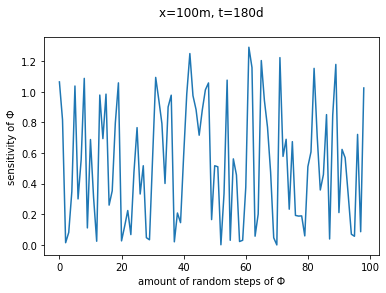

Sensivity of all mean phase
0.4965720849837646


In [66]:
#calculate sensitivity for phase

mean_phase_list = []




for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        phase_list=[]
        hxt_list=[]
        for ph in phase:
            hxt = calculate_hxt_for_one_variable(D_mean, A_mean, w_mean, ph, x, t)
            #S_phase_list=abs((hxt-hxt_previous)/(ph-phase_previous))
            #Sensitivity_phase_list.append(S_phase_list)
            phase_list.append(ph)
            hxt_list.append(hxt)
       
       
        hxt_list_1 = hxt_list[:-1]
        hxt_np_1 = np.array(hxt_list_1)
        hxt_list_2 = hxt_list[1:]
        hxt_np_2 = np.array(hxt_list_2)
        phase_list_1 = phase_list[:-1]
        phase_np_1 = np.array(phase_list_1)
        phase_list_2 = phase_list[1:]
        phase_np_2 = np.array(phase_list_2)
        
        
        S_phase_list=abs((hxt_np_1-hxt_np_2)/(phase_np_1-phase_np_2))
        S_phase_2=mean(S_phase_list) #sensitivity of phase
        Sensitivity_phase_list.append(S_phase)
        print("Sensivity of phase with:"," x=",x," t=",t)
        print(S_phase_2)
        mean_phase_list.append(S_phase_2)
        
        
        plt.plot(S_phase_list)
        plt.title("x={}m, t={}d\n".format(x, t))
        plt.ylabel('sensitivity of Ф')
        plt.xlabel('amount of random steps of Ф')
        plt.show()
        
        

           

mean_of_mean_phase=mean(mean_phase_list) 
print("Sensivity of all mean phase")
print(mean_of_mean_phase)

[0.15043945 0.01239643]


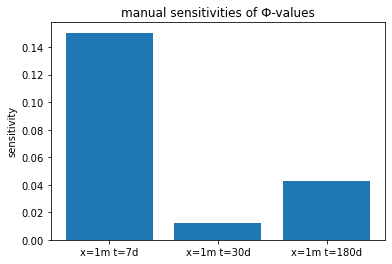

[0.99183965 0.40072564]


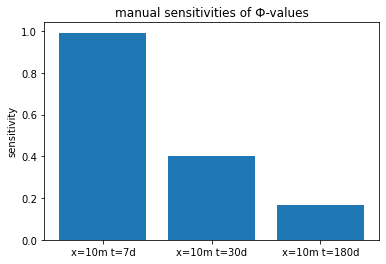

[1.22119443 0.9462318 ]


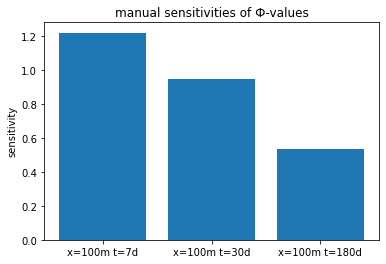

In [67]:
#plotting of bar graphs for the phase for each combination of x and t 
phase_array= np.array(mean_phase_list)
print(phase_array[0:2])
height = (phase_array[0],phase_array[1], phase_array[2])
bars = ('x=1m t=7d', 'x=1m t=30d','x=1m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of Ф-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

phase_array= np.array(mean_phase_list)
print(phase_array[3:5])
height = (phase_array[3],phase_array[4], phase_array[5])
bars = ('x=10m t=7d', 'x=10m t=30d','x=10m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of Ф-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

phase_array= np.array(mean_phase_list)
print(phase_array[6:8])
height = (phase_array[6],phase_array[7], phase_array[8])
bars = ('x=100m t=7d', 'x=100m t=30d','x=100m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of Ф-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Sensivity of A with:  x= 1  t= 7
0.6757964596674557


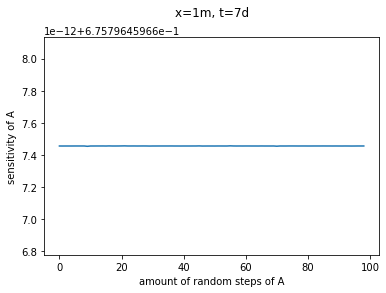

Sensivity of A with:  x= 1  t= 30
0.9818739077018884


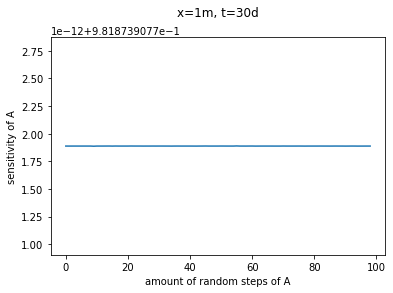

Sensivity of A with:  x= 1  t= 180
0.11004709338396156


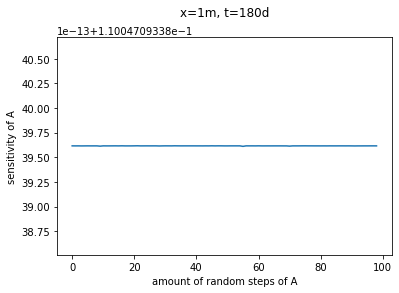

Sensivity of A with:  x= 10  t= 7
0.8460206528629592


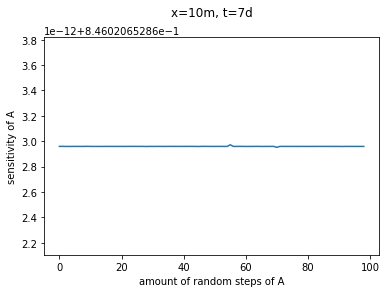

Sensivity of A with:  x= 10  t= 30
0.8308185269866178


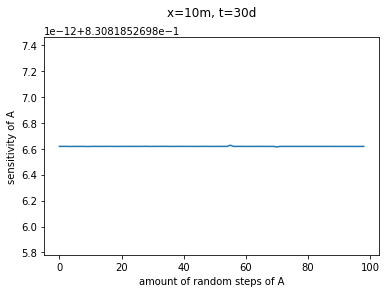

Sensivity of A with:  x= 10  t= 180
0.8030414436238198


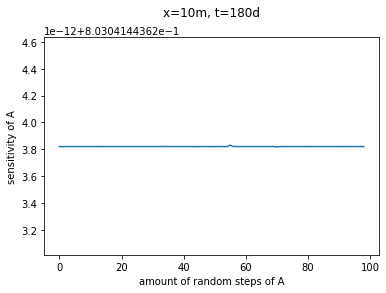

Sensivity of A with:  x= 100  t= 7
0.051677530972299934


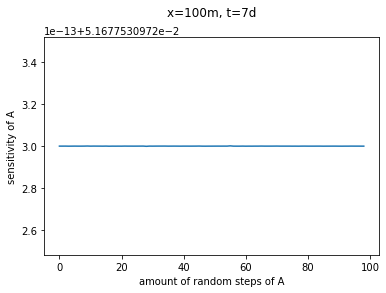

Sensivity of A with:  x= 100  t= 30
0.1975621186494633


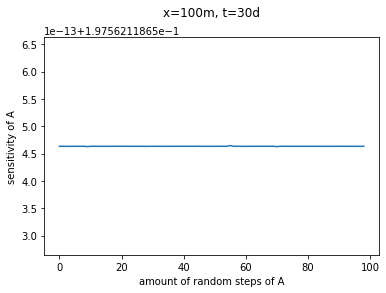

Sensivity of A with:  x= 100  t= 180
0.32317588573723266


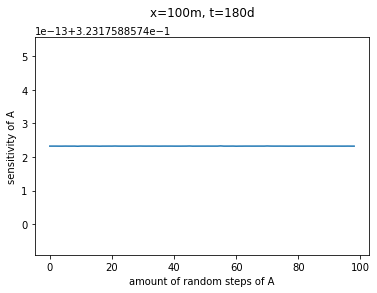

Sensivity of all mean A
0.5355570688428554


In [68]:
#calculate sensitivity for amplitude

mean_A_list = []
for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        A_list = []
        hxt_list = []
        for a in A:
            hxt = calculate_hxt_for_one_variable(D_mean, a, w_mean, phase_mean, x, t)
            A_list.append(a)
            hxt_list.append(hxt)
        
       
       
        hxt_list_1 = hxt_list[:-1]
        hxt_np_1 = np.array(hxt_list_1)
        hxt_list_2 = hxt_list[1:]
        hxt_np_2 = np.array(hxt_list_2)
        A_list_1 = A_list[:-1]
        A_np_1 = np.array(A_list_1)
        A_list_2 = A_list[1:]
        A_np_2 = np.array(A_list_2)
        
        
        S_A_list=abs((hxt_np_1-hxt_np_2)/(A_np_1-A_np_2))
       
        
        
        S_A_2=mean(S_A_list) #sensitivity of A
        print("Sensivity of A with:"," x=",x," t=",t)
        print(S_A_2)
        mean_A_list.append(S_A_2)
        
        plt.plot(S_A_list)
        plt.title("x={}m, t={}d\n".format(x, t))
        plt.ylabel('sensitivity of A')
        plt.xlabel('amount of random steps of A')
        plt.show()
        
mean_of_mean_A=mean(mean_A_list)
print("Sensivity of all mean A")
print(mean_of_mean_A)

In [69]:
#calculate sensitivity for amplitude

mean_A_list = []
for x in [1, 10, 100]:
    for t in [7, 30, 180]:
        A_list = []
        hxt_list = []
        for a in A:
            hxt = calculate_hxt_for_one_variable(D_mean, a, w_mean, phase_mean, x, t)
            A_list.append(a)
            hxt_list.append(hxt)
        
       
       
        hxt_list_1 = hxt_list[:-1]
        hxt_np_1 = np.array(hxt_list_1)
        hxt_list_2 = hxt_list[1:]
        hxt_np_2 = np.array(hxt_list_2)
        A_list_1 = A_list[:-1]
        A_np_1 = np.array(A_list_1)
        A_list_2 = A_list[1:]
        A_np_2 = np.array(A_list_2)
        
        
        S_A_list=abs((hxt_np_1-hxt_np_2)/(A_np_1-A_np_2))
        S_A_2=mean(S_A_list) #sensitivity of A
        print("Sensivity of A with:"," x=",x," t=",t)
        print(S_A_2)
        mean_A_list.append(S_A_2)
        
mean_of_mean_A=mean(mean_A_list)
print("Sensivity of all mean A")
print(mean_of_mean_A)

Sensivity of A with:  x= 1  t= 7
0.6757964596674557
Sensivity of A with:  x= 1  t= 30
0.9818739077018884
Sensivity of A with:  x= 1  t= 180
0.11004709338396156
Sensivity of A with:  x= 10  t= 7
0.8460206528629592
Sensivity of A with:  x= 10  t= 30
0.8308185269866178
Sensivity of A with:  x= 10  t= 180
0.8030414436238198
Sensivity of A with:  x= 100  t= 7
0.051677530972299934
Sensivity of A with:  x= 100  t= 30
0.1975621186494633
Sensivity of A with:  x= 100  t= 180
0.32317588573723266
Sensivity of all mean A
0.5355570688428554


[0.67579646 0.98187391]


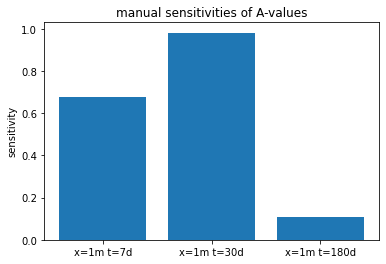

[0.84602065 0.83081853]


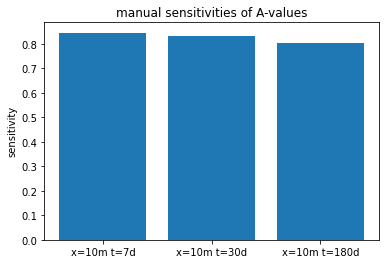

[0.05167753 0.19756212]


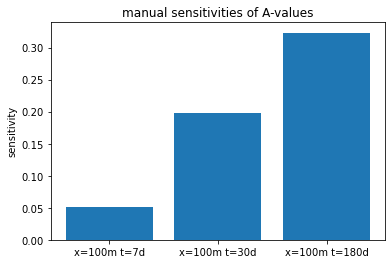

In [70]:
#plotting of bar graphs for the Amplitude for each combination of x and t 
A_array= np.array(mean_A_list)
print(A_array[0:2])
height = (A_array[0],A_array[1], A_array[2])
bars = ('x=1m t=7d', 'x=1m t=30d','x=1m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of A-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

A_array= np.array(mean_A_list)
print(A_array[3:5])
height = (A_array[3],A_array[4], A_array[5])
bars = ('x=10m t=7d', 'x=10m t=30d','x=10m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of A-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

A_array= np.array(mean_A_list)
print(A_array[6:8])
height = (A_array[6],A_array[7], A_array[8])
bars = ('x=100m t=7d', 'x=100m t=30d','x=100m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of A-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Sensivity of D with:  x= 1  t= 7
5.459332586888523e-06


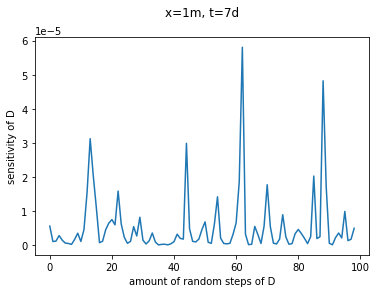

Sensivity of D with:  x= 1  t= 30
7.99748355583884e-06


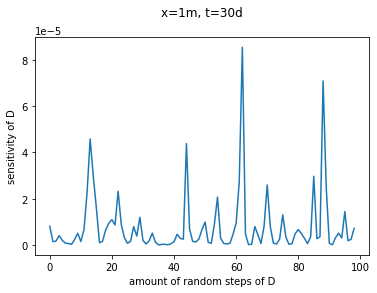

Sensivity of D with:  x= 1  t= 180
9.103133397731418e-07


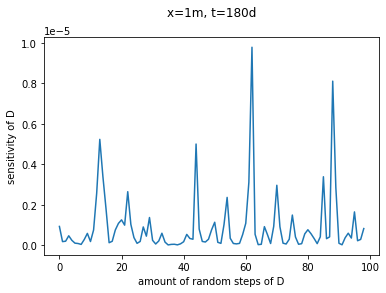

Sensivity of D with:  x= 10  t= 7
5.72138678479189e-05


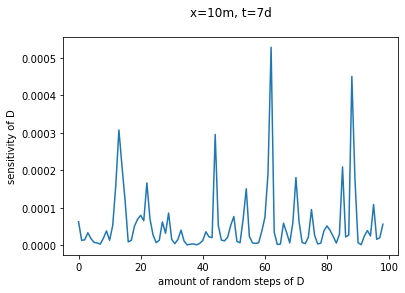

Sensivity of D with:  x= 10  t= 30
5.639191378227646e-05


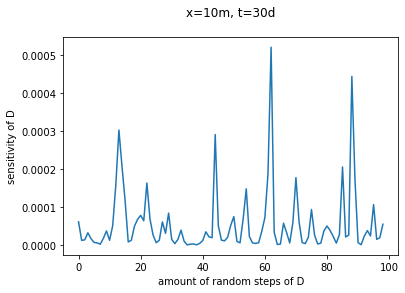

Sensivity of D with:  x= 10  t= 180
5.447013646414542e-05


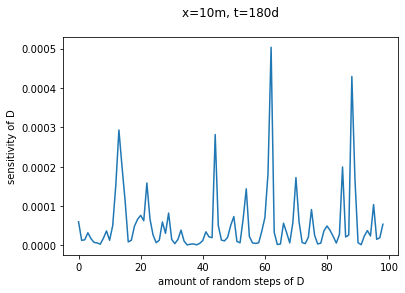

Sensivity of D with:  x= 100  t= 7
9.270596429687694e-06


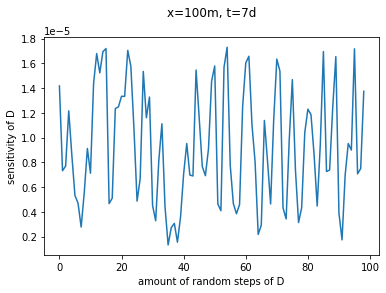

Sensivity of D with:  x= 100  t= 30
3.54128922633729e-05


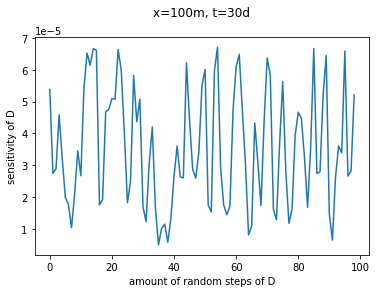

Sensivity of D with:  x= 100  t= 180
5.793316241488789e-05


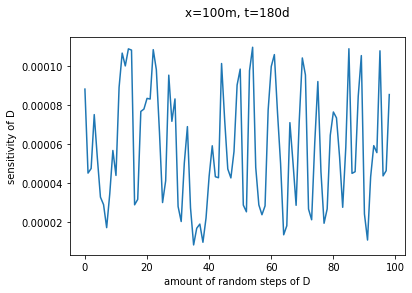

Sensivity of all mean D
3.167329985386553e-05


In [71]:
#calculate sensitivity for D

mean_D_list = []
for x in [1, 10, 100]:
    for t in[7, 30, 180]:
        D_list = []
        hxt_list = []
        for d in D:
            hxt = calculate_hxt_for_one_variable(d, A_mean, w_mean, phase_mean, x, t)
            D_list.append(d)
            hxt_list.append(hxt)
       
       
        hxt_list_1 = hxt_list[:-1]
        hxt_np_1 = np.array(hxt_list_1)
        hxt_list_2 = hxt_list[1:]
        hxt_np_2 = np.array(hxt_list_2)
        D_list_1 = D_list[:-1]
        D_np_1 = np.array(D_list_1)
        D_list_2 = D_list[1:]
        D_np_2 = np.array(D_list_2)
        
        
        S_D_list=abs((hxt_np_1-hxt_np_2)/(D_np_1-D_np_2))
        S_D_2=mean(S_D_list) 
        print("Sensivity of D with:"," x=",x," t=",t)
        print(S_D_2)
        mean_D_list.append(S_D_2)
        
        
        
        
        plt.plot(S_D_list)
        plt.title("x={}m, t={}d\n".format(x, t))
        plt.ylabel('sensitivity of D')
        plt.xlabel('amount of random steps of D')
        plt.show()
        
mean_of_mean_D=mean(mean_D_list)
print("Sensivity of all mean D")
print(mean_of_mean_D)

[5.45933259e-06 7.99748356e-06]


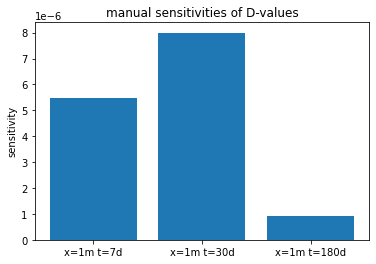

[5.72138678e-05 5.63919138e-05]


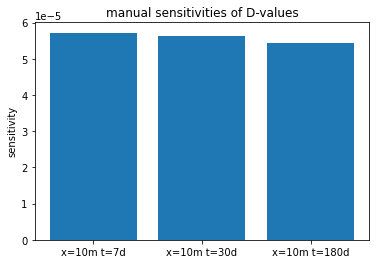

[9.27059643e-06 3.54128923e-05]


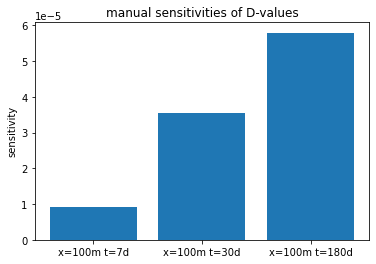

In [72]:
#plotting of bar graphs for the Dispersivity for each combination of x and t 
D_array= np.array(mean_D_list)
print(D_array[0:2])
height = (D_array[0],D_array[1], D_array[2])
bars = ('x=1m t=7d', 'x=1m t=30d','x=1m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of D-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

D_array= np.array(mean_D_list)
print(D_array[3:5])
height = (D_array[3],D_array[4], D_array[5])
bars = ('x=10m t=7d', 'x=10m t=30d','x=10m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of D-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

D_array= np.array(mean_D_list)
print(D_array[6:8])
height = (D_array[6],D_array[7], D_array[8])
bars = ('x=100m t=7d', 'x=100m t=30d','x=100m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of D-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Sensivity of omega with:  x= 1  t= 7
1.0378722552840338


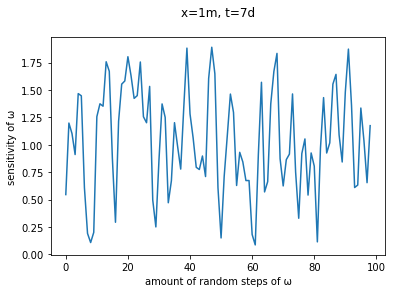

Sensivity of omega with:  x= 1  t= 30
1.6990329089104288


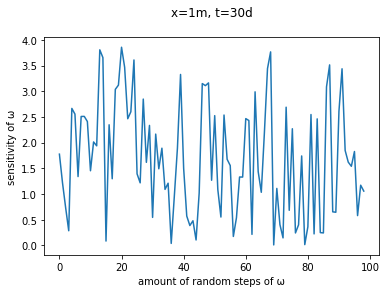

Sensivity of omega with:  x= 1  t= 180
2.8135878336640823


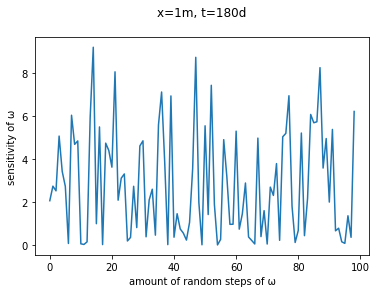

Sensivity of omega with:  x= 10  t= 7
2.8089084681991063


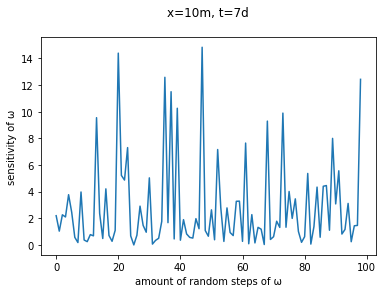

Sensivity of omega with:  x= 10  t= 30
4.022655810249072


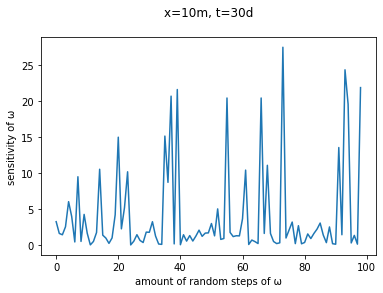

Sensivity of omega with:  x= 10  t= 180
4.738173061527564


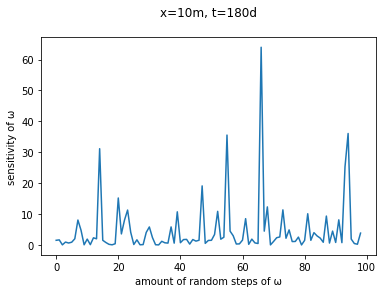

Sensivity of omega with:  x= 100  t= 7
1.5974060237171905


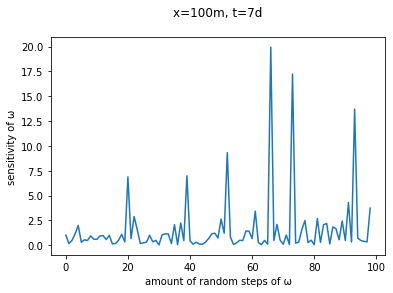

Sensivity of omega with:  x= 100  t= 30
1.592164732728374


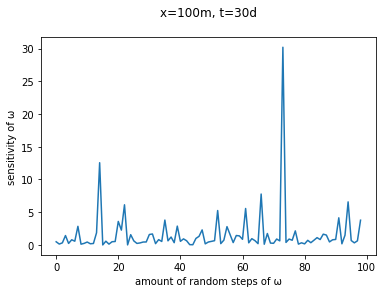

Sensivity of omega with:  x= 100  t= 180
1.6384090875834867


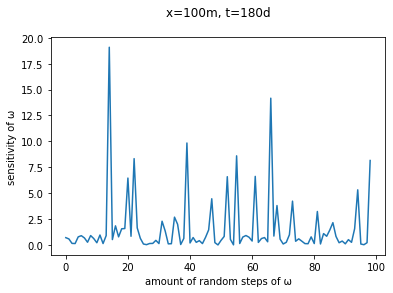

Sensivity of all mean omega
2.4386900202070376


In [73]:
#calculate sensitivity for omega

mean_w_list = []
for x in [1, 10, 100]:
    for t in[7, 30, 180]:
        w_list = []
        hxt_list = []
        for om in w:
            hxt = calculate_hxt_for_one_variable(D_mean, A_mean, om, phase_mean, x, t)
            w_list.append(om)
            hxt_list.append(hxt)
       
        hxt_list_1 = hxt_list[:-1]
        hxt_np_1 = np.array(hxt_list_1)
        hxt_list_2 = hxt_list[1:]
        hxt_np_2 = np.array(hxt_list_2)
        w_list_1 = w_list[:-1]
        w_np_1 = np.array(w_list_1)
        w_list_2 = w_list[1:]
        w_np_2 = np.array(w_list_2)
        
        
        S_w_list=abs((hxt_np_1-hxt_np_2)/(w_np_1-w_np_2))
        S_w_2=mean(S_w_list) 
        print("Sensivity of omega with:"," x=",x," t=",t)
        print(S_w_2)
        mean_w_list.append(S_w_2)
        
       
        
        plt.plot(S_w_list)
        plt.title("x={}m, t={}d\n".format(x, t))
        plt.ylabel('sensitivity of ω')
        plt.xlabel('amount of random steps of ω')
        plt.show()
        
mean_of_mean_w=mean(mean_w_list)
print("Sensivity of all mean omega")
print(mean_of_mean_w)

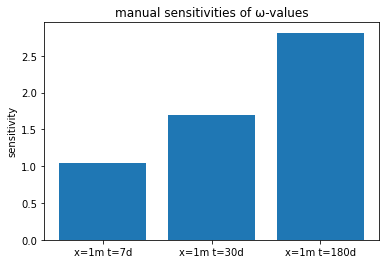

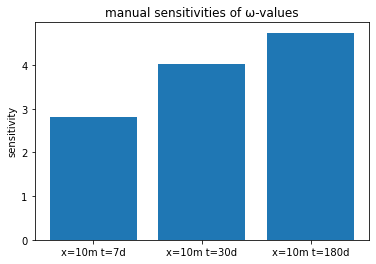

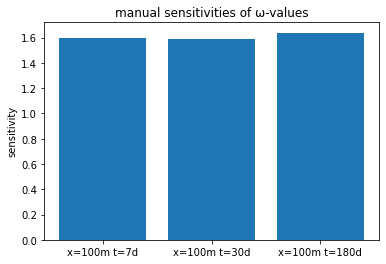

In [74]:
#plotting of bar graphs for the frequency for each combination of x and t 
w_array= np.array(mean_w_list)
height = (w_array[0],w_array[1], w_array[2])
bars = ('x=1m t=7d', 'x=1m t=30d','x=1m t=180d')
#bars = ('x=1 t=7', 'x=1 t=30', 'x=1 t=180', 'x=10 t=7', 'x=10 t=30', 'x=10 t=180', 'x=100 t=7','x=100 t=30', 'x=100 t=180')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of ω-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

w_array= np.array(mean_w_list)
height = (w_array[3],w_array[4], w_array[5])
bars = ('x=10m t=7d', 'x=10m t=30d','x=10m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of ω-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

w_array= np.array(mean_w_list)
height = (w_array[6],w_array[7], w_array[8])
bars = ('x=100m t=7d', 'x=100m t=30d','x=100m t=180d')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('manual sensitivities of ω-values')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

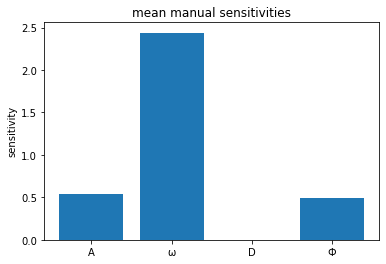

In [75]:
#plotting of bar graphs of the mean values of the sensitivity of the four parameters 

#print(mean_of_mean_A,mean_of_mean_w, mean_of_mean_D,mean_of_mean_phase)

height = (mean_of_mean_A,mean_of_mean_w, mean_of_mean_D,mean_of_mean_phase)
bars = ('A', 'ω','D','Ф')
#bars = ('x=1 t=7', 'x=1 t=30', 'x=1 t=180', 'x=10 t=7', 'x=10 t=30', 'x=10 t=180', 'x=100 t=7','x=100 t=30', 'x=100 t=180')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

plt.title('mean manual sensitivities')
plt.ylabel('sensitivity')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()